In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data Cleansing

In [4]:
# handling null values through imputing by the median for the numerical columns (train data)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train['Age']= imputer.fit_transform(train[['Age']])
train['RoomService']= imputer.fit_transform(train[['RoomService']])
train['FoodCourt']= imputer.fit_transform(train[['FoodCourt']])
train['ShoppingMall']= imputer.fit_transform(train[['ShoppingMall']])
train['Spa']= imputer.fit_transform(train[['Spa']])
train['VRDeck']= imputer.fit_transform(train[['VRDeck']])

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
# imputing numerical columns (test data)
test['Age']= imputer.fit_transform(test[['Age']])
test['RoomService']= imputer.fit_transform(test[['RoomService']])
test['FoodCourt']= imputer.fit_transform(test[['FoodCourt']])
test['ShoppingMall']= imputer.fit_transform(test[['ShoppingMall']])
test['Spa']= imputer.fit_transform(test[['Spa']])
test['VRDeck']= imputer.fit_transform(test[['VRDeck']])

In [7]:
# filling null values for categorical columns with the most occurred values (train set)
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
# filling null categorical columns (test set)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)

In [10]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
# deleting name column from both sets
del train['Name']
del test['Name']

In [12]:
train['CryoSleep'].unique()

array([False,  True])

In [13]:
# replacing True and False with binary values
train['CryoSleep'] = train['CryoSleep'].replace({
    True : 1,
    False : 0
})

train['VIP'] = train['VIP'].replace({
    True : 1,
    False : 0
})

In [14]:
# same step for the test set
test['CryoSleep'] = test['CryoSleep'].replace({
    True : 1,
    False : 0
})

test['VIP'] = test['VIP'].replace({
    True : 1,
    False : 0
})

In [15]:
# high cardinality column cabin can be removed from both sets
del train['Cabin']
del test['Cabin']

In [16]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [21]:
# converting float datatypes to int for better visibility
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')
train['RoomService'] = train['RoomService'].astype('int')
test['RoomService'] = test['RoomService'].astype('int')
train['FoodCourt'] = train['FoodCourt'].astype('int')
test['FoodCourt'] = test['FoodCourt'].astype('int')
train['ShoppingMall'] = train['ShoppingMall'].astype('int')
test['ShoppingMall'] = test['ShoppingMall'].astype('int')
train['Spa'] = train['Spa'].astype('int')
test['Spa'] = test['Spa'].astype('int')
train['VRDeck'] = train['VRDeck'].astype('int')
test['VRDeck'] = test['VRDeck'].astype('int')

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4277 non-null   object
 2   CryoSleep     4277 non-null   int64 
 3   Destination   4277 non-null   object
 4   Age           4277 non-null   int32 
 5   VIP           4277 non-null   int64 
 6   RoomService   4277 non-null   int32 
 7   FoodCourt     4277 non-null   int32 
 8   ShoppingMall  4277 non-null   int32 
 9   Spa           4277 non-null   int32 
 10  VRDeck        4277 non-null   int32 
dtypes: int32(6), int64(2), object(3)
memory usage: 267.4+ KB


In [23]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0,0,0,0,0,False
1,0002_01,Earth,0,TRAPPIST-1e,24,0,109,9,25,549,44,True
2,0003_01,Europa,0,TRAPPIST-1e,58,1,43,3576,0,6715,49,False
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0,1283,371,3329,193,False
4,0004_01,Earth,0,TRAPPIST-1e,16,0,303,70,151,565,2,True


# EDA

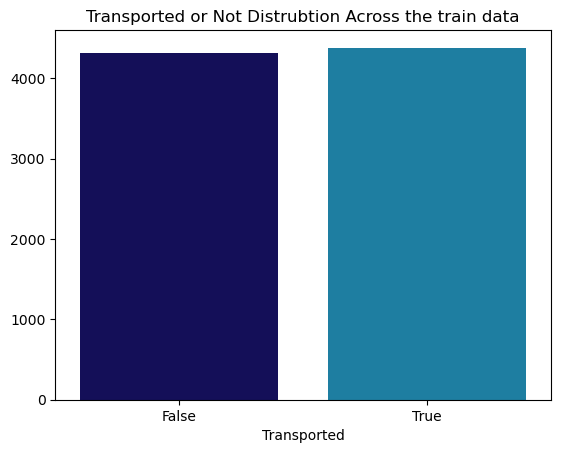

In [33]:
colors = ['#090364','#0888b7']
palette = sns.color_palette(colors)
sns.barplot(x=train['Transported'].value_counts().index, y=train['Transported'].value_counts().values,
           palette = palette)
plt.title('Transported or Not Distrubtion Across the train data')
plt.show()
# label is almost evenly distrubted across the data 

In [34]:
list(set(train.dtypes.tolist()))
train_numerical = train.select_dtypes(['int'])

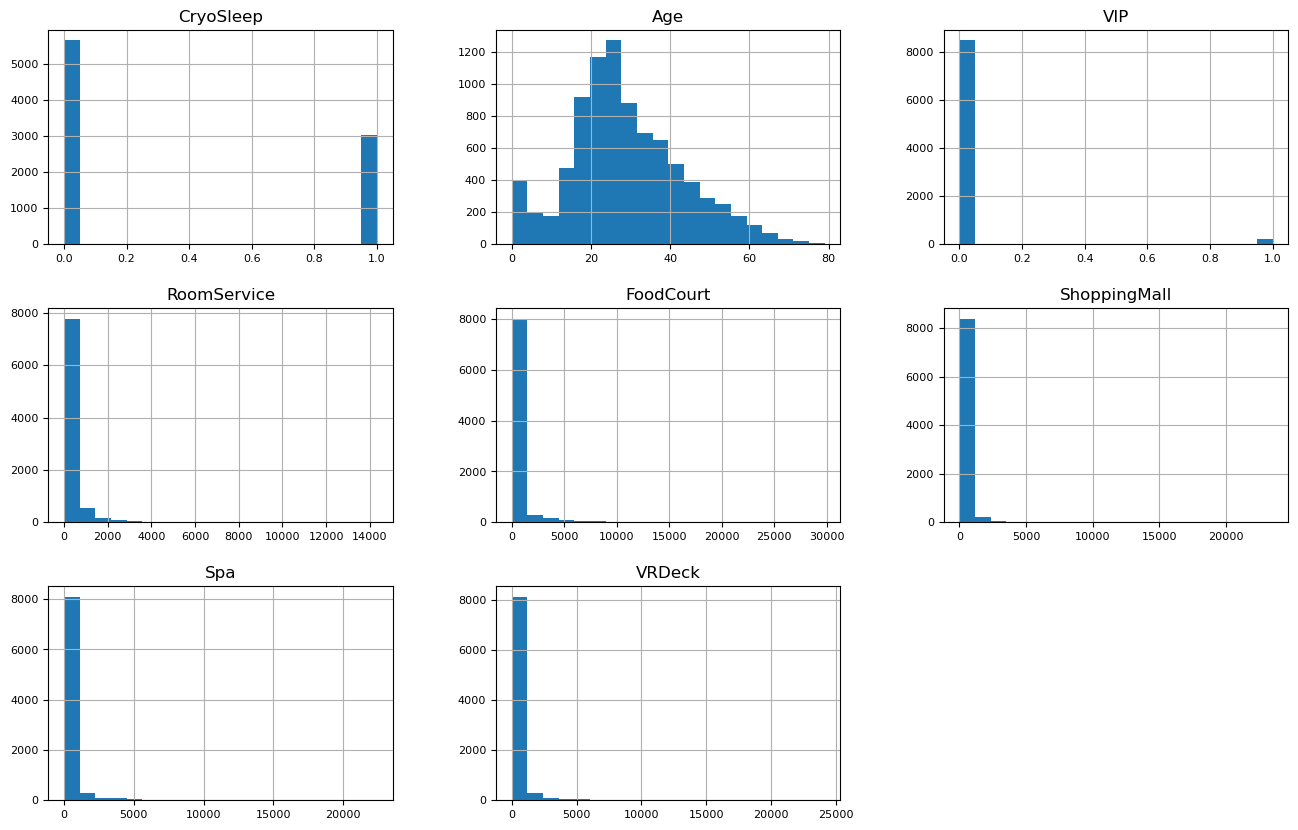

In [37]:
train_numerical.hist(figsize=(16, 10), bins=20, xlabelsize=8, ylabelsize=8)
plt.title('Numerical Columns Distribution');

In [38]:
train['VIP'].value_counts()

VIP
0    8494
1     199
Name: count, dtype: int64

In [39]:
test['VIP'].value_counts()

VIP
0    4203
1      74
Name: count, dtype: int64

In [40]:
# since majority of VIP values are considered to be zeros, it will be removed from both sets
del train['VIP']
del test['VIP']

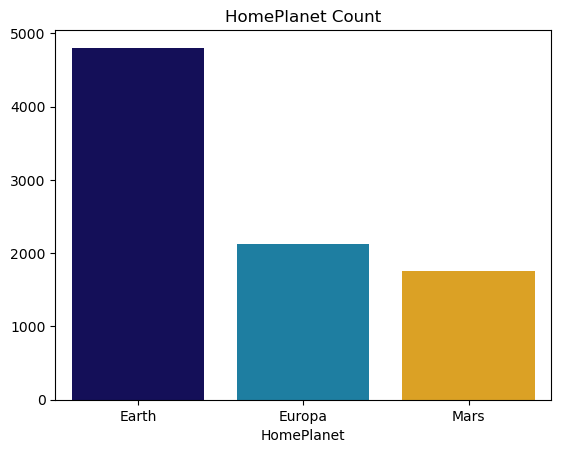

In [41]:
colors = ['#090364','#0888b7', '#f9ac07']
palette = sns.color_palette(colors)
sns.barplot(x=train['HomePlanet'].value_counts().index, y=train['HomePlanet'].value_counts().values,
           palette = palette)
plt.title('HomePlanet Count')
plt.show()

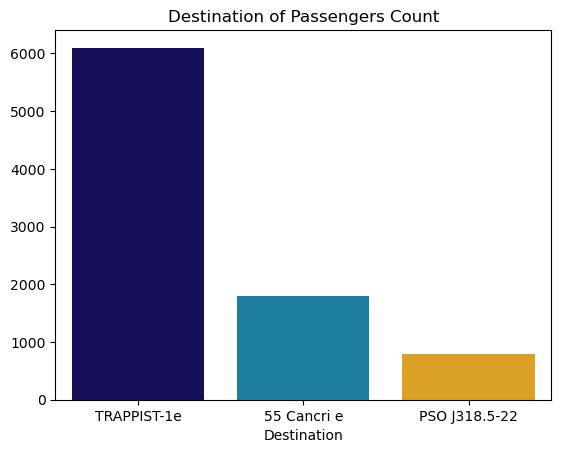

In [43]:
colors = ['#090364','#0888b7', '#f9ac07']
palette = sns.color_palette(colors)
sns.barplot(x=train['Destination'].value_counts().index, y=train['Destination'].value_counts().values,
           palette = palette)
plt.title('Destination of Passengers Count')
plt.show()

In [48]:
print("""
Average Age of Passengers From each Planet they were living in""")
round(train.groupby('HomePlanet')['Age'].mean(), 2)


Average Age of Passengers From each Planet they were living in


HomePlanet
Earth     26.20
Europa    34.26
Mars      29.24
Name: Age, dtype: float64


        Plot showing Distribution of HomePlanet and Destination categories for each Transported group.


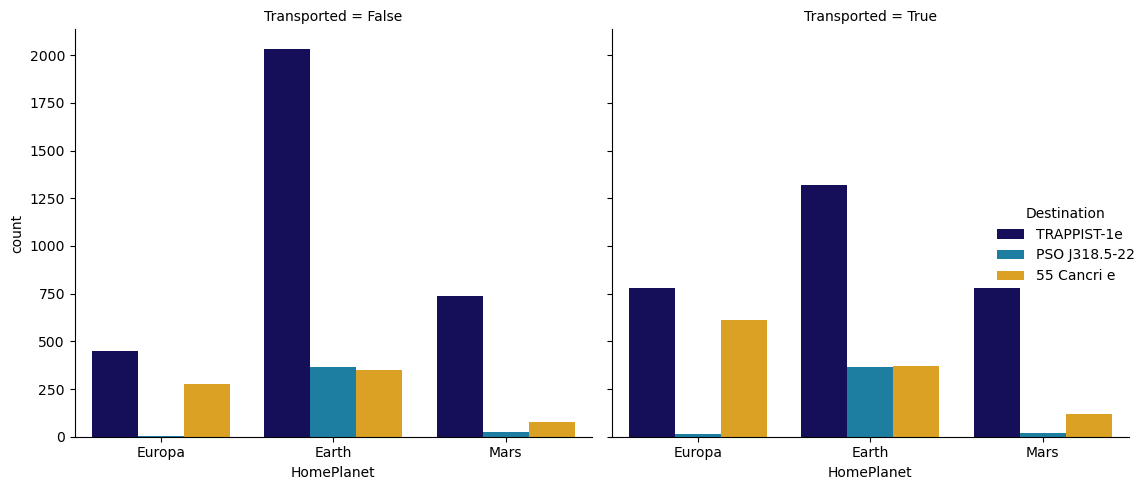

In [62]:
print("""
        Plot showing Distribution of HomePlanet and Destination categories for each Transported group.""")
colors = ['#090364','#0888b7', '#f9ac07']
palette = sns.color_palette(colors)
sns.catplot(x='HomePlanet', hue='Destination', col='Transported', data=train, kind='count', palette = palette)
plt.tight_layout()
plt.show()

In [50]:
# splitting the data
x = train.drop('Transported', axis=1)
y = train['Transported']

In [55]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [52]:
train.select_dtypes(['int']).columns

Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck'],
      dtype='object')

In [53]:
train.select_dtypes(['object']).columns

Index(['PassengerId', 'HomePlanet', 'Destination'], dtype='object')

In [54]:
numerical_features = ['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck']
categorical_features = ['HomePlanet', 'Destination']

In [67]:
def experiment(model, scaler):
    preprocessing=ColumnTransformer(transformers=[
        ('scaling', scaler, numerical_features),
        ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

    pipeline=Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('modeling', model)
    ])

    pipeline.fit(x, y)
    result = cross_val_score(pipeline, x, y)
    prediction = pipeline.predict(x)
    print(classification_report(y, prediction))
    print('Accuracy Score =', accuracy_score(y, prediction))
    print("""
    *Evaluation for the model performance* :
    --------------------------------------""")
    print(result)
    print('cross val mean =', result.mean()*100)
    print('Standard Deviation =', result.std())

In [68]:
# EXP (Logistic Regression)
experiment(LogisticRegression(random_state=7), StandardScaler())

              precision    recall  f1-score   support

       False       0.79      0.77      0.78      4315
        True       0.78      0.80      0.79      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693

Accuracy Score = 0.7869550212814909

    *Evaluation for the model performance* :
    --------------------------------------
[0.78378378 0.78723404 0.77918344 0.783084   0.79459148]
cross val mean = 78.55753508325553
Standard Deviation = 0.005182952486687152


In [69]:
# EXP (KNN)
experiment(KNeighborsClassifier(), MinMaxScaler())

              precision    recall  f1-score   support

       False       0.80      0.83      0.81      4315
        True       0.83      0.79      0.81      4378

    accuracy                           0.81      8693
   macro avg       0.81      0.81      0.81      8693
weighted avg       0.81      0.81      0.81      8693

Accuracy Score = 0.8109973541930289

    *Evaluation for the model performance* :
    --------------------------------------
[0.76423232 0.76365727 0.75043128 0.74798619 0.76294591]
cross val mean = 75.7850595986874
Standard Deviation = 0.0071099768763205244


In [70]:
# EXP 3 (RF)
experiment(RandomForestClassifier(), StandardScaler())

              precision    recall  f1-score   support

       False       0.97      0.88      0.93      4315
        True       0.89      0.98      0.93      4378

    accuracy                           0.93      8693
   macro avg       0.93      0.93      0.93      8693
weighted avg       0.93      0.93      0.93      8693

Accuracy Score = 0.9291383872080985

    *Evaluation for the model performance* :
    --------------------------------------
[0.78895917 0.78550891 0.77573318 0.78711162 0.79516686]
cross val mean = 78.6495949221508
Standard Deviation = 0.006299882991359274


In [71]:
# EXP 4 (CatBoost)
experiment(CatBoostClassifier(verbose=0), MinMaxScaler())

              precision    recall  f1-score   support

       False       0.86      0.81      0.84      4315
        True       0.83      0.87      0.85      4378

    accuracy                           0.84      8693
   macro avg       0.84      0.84      0.84      8693
weighted avg       0.84      0.84      0.84      8693

Accuracy Score = 0.8413666168181295

    *Evaluation for the model performance* :
    --------------------------------------
[0.7947096  0.7906843  0.79528465 0.80264672 0.80552359]
cross val mean = 79.77697723186547
Standard Deviation = 0.005470844565942882


# Tuning CatBoost

In [96]:
preprocessing=ColumnTransformer(transformers=[
    ('scaling', MinMaxScaler(), numerical_features),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

pipeline=Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('modeling', CatBoostClassifier(verbose=0))
])

# hyperparameter tuning
param_grid = {
    'modeling__iterations': [50, 75],
    'modeling__depth': [6, 7],
    'modeling__learning_rate': [0.1, 0.2]
}

grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(x, y)
prediction = grid.predict(x)
print(classification_report(y, prediction))
print('Accuracy Score =', accuracy_score(y, prediction))
best_model = grid.best_estimator_
result = cross_val_score(best_model, x, y, cv=5)
print("""
*Evaluation for the model performance* :
--------------------------------------""")
print(result)
print('cross val mean =', result.mean()*100)
print('Standard Deviation =', result.std())

              precision    recall  f1-score   support

       False       0.83      0.76      0.79      4315
        True       0.78      0.84      0.81      4378

    accuracy                           0.80      8693
   macro avg       0.80      0.80      0.80      8693
weighted avg       0.80      0.80      0.80      8693

Accuracy Score = 0.8025997929368457

*Evaluation for the model performance* :
--------------------------------------
[0.79125934 0.78780909 0.79010926 0.80840046 0.80379747]
cross val mean = 79.62751233960499
Standard Deviation = 0.008227505033552863


In [97]:
grid.best_params_

{'modeling__depth': 6,
 'modeling__iterations': 50,
 'modeling__learning_rate': 0.2}

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4277 non-null   object
 2   CryoSleep     4277 non-null   int64 
 3   Destination   4277 non-null   object
 4   Age           4277 non-null   int32 
 5   RoomService   4277 non-null   int32 
 6   FoodCourt     4277 non-null   int32 
 7   ShoppingMall  4277 non-null   int32 
 8   Spa           4277 non-null   int32 
 9   VRDeck        4277 non-null   int32 
dtypes: int32(6), int64(1), object(3)
memory usage: 234.0+ KB


In [102]:
# prediction for the test set
grid.fit(x, y)
final_prediction = grid.predict(test)

In [106]:
final_submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Transported' : final_prediction
})

In [107]:
final_submission.to_csv('spaceship_prediction.csv', index=False)
print("File Created : 'spaceship_prediction.csv'")

File Created : 'spaceship_prediction.csv'


In [108]:
spaceship = pd.read_csv('spaceship_prediction.csv')
spaceship

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
